# 1 Preprocess

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the data with headers
file_path = "/content/datapreprocessing.csv"
data = pd.read_csv(file_path)

print("Original data:")
print(data)

# Select numeric columns only for preprocessing
numeric_columns = data.select_dtypes(include=[np.number])

# Handle missing values - let's fill with the mean of each column
numeric_data = numeric_columns.fillna(numeric_columns.mean())

# Mean removal
mean_removed = numeric_data - numeric_data.mean()
data_mean_removed = numeric_data.copy()
data_mean_removed.loc[:, :] = mean_removed

# Normalization (min-max scaling)
normalized = (numeric_data - numeric_data.min()) / (numeric_data.max() - numeric_data.min())

# Standardization
scaler = StandardScaler()
standardized = scaler.fit_transform(numeric_data)
standardized_df = pd.DataFrame(standardized, columns=numeric_data.columns)

# Print results
print("\nMean Removed Data:")
print(data_mean_removed)

print("\nNormalized Data:")
print(normalized)

print("\nStandardized Data:")
print(standardized_df)


Original data:
   sno  rollno   age  marks1  marks2  marks3 result
0    1     111  19.0    50.0     NaN     NaN      p
1    2     112   NaN    25.0    25.0     NaN      p
2    3     113  18.0    45.0    35.0    10.0      p
3    4     114   6.0    30.0    50.0    50.0      f
4    5     115   NaN     NaN    22.0    25.0      f

Mean Removed Data:
   sno  rollno       age  marks1  marks2     marks3
0   -2      -2  4.666667    12.5     0.0   0.000000
1   -1      -1  0.000000   -12.5    -8.0   0.000000
2    0       0  3.666667     7.5     2.0 -18.333333
3    1       1 -8.333333    -7.5    17.0  21.666667
4    2       2  0.000000     0.0   -11.0  -3.333333

Normalized Data:
    sno  rollno       age  marks1    marks2    marks3
0  0.00    0.00  1.000000     1.0  0.392857  0.458333
1  0.25    0.25  0.641026     0.0  0.107143  0.458333
2  0.50    0.50  0.923077     0.8  0.464286  0.000000
3  0.75    0.75  0.000000     0.2  1.000000  1.000000
4  1.00    1.00  0.641026     0.5  0.000000  0.375000

# 2.1

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample data
data = pd.DataFrame({
    'Weather': ['Sunny', 'Rainy', 'Sunny', 'Sunny'],
    'Wind': ['Mild', 'Mild', 'High', 'Mild'],
    'Temp': ['Moderate', 'Mild', 'Moderate', 'Mild'],
    'go': ['Yes', 'No', 'Yes', 'Yes']
})

# Encode categorical variables
encoder = LabelEncoder()
for column in data.columns:
    data[column] = encoder.fit_transform(data[column])

# Split data
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5


# 2.2

Confusion Matrix:
 [[64  4]
 [ 3 29]]
Accuracy: 0.93


<ipython-input-4-bc5317057f71>:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


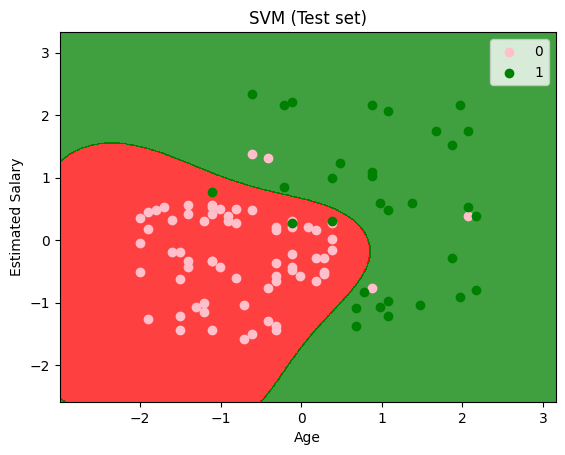

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

# Load data (replace with your actual file)
data = pd.read_csv("/content/social.csv")
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Visualization
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('pink', 'green'))(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# 2.3

Confusion Matrix:
 [[62  3]
 [18 15]]
Accuracy: 0.7857142857142857


<ipython-input-5-00185e143ed4>:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


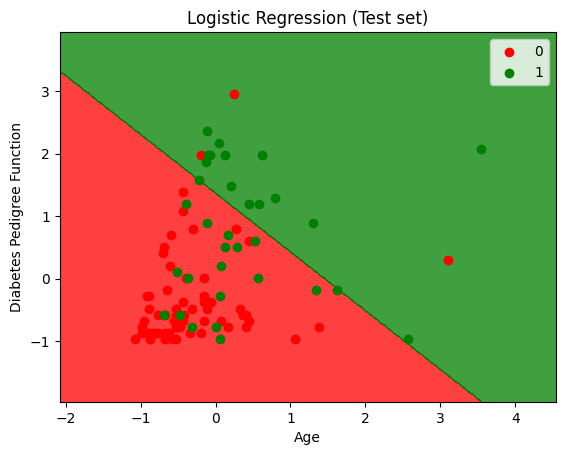

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

# Load data (replace with your actual file)
data = pd.read_csv("/content/diabetes.csv")
X = data.iloc[:, [4, 7]].values  # Using Age and DiabetesPedigreeFunction as features
y = data.iloc[:, 8].values  # Outcome

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Visualization
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Diabetes Pedigree Function')
plt.legend()
plt.show()

# 2.4

In [ ]:
import pandas as pd
import math
import numpy as np

# Sample data
data = pd.DataFrame({
    "outlook": ["sunny", "sunny", "overcast", "rainy", "rainy", "rainy", "overcast", "sunny", "sunny", "rainy", "sunny", "overcast", "overcast", "rainy"],
    "temperature": ["hot", "hot", "hot", "mild", "cool", "cool", "cool", "mild", "cool", "mild", "mild", "mild", "hot", "mild"],
    "humidity": ["high", "high", "high", "high", "normal", "normal", "normal", "high", "normal", "normal", "normal", "high", "normal", "high"],
    "wind": ["weak", "strong", "weak", "weak", "weak", "strong", "strong", "weak", "weak", "weak", "strong", "strong", "weak", "strong"],
    "answer": ["no", "no", "yes", "yes", "yes", "no", "yes", "no", "yes", "yes", "yes", "yes", "yes", "no"]
})

features = [feat for feat in data]
features.remove("answer")

class Node:
    def __init__(self):
        self.children = []
        self.value = ""
        self.isLeaf = False
        self.pred = ""

def entropy(examples):
    pos = 0.0
    neg = 0.0
    for _, row in examples.iterrows():
        if row["answer"] == "yes":
            pos += 1
        else:
            neg += 1
    if pos == 0.0 or neg == 0.0:
        return 0.0
    else:
        p = pos / (pos + neg)
        n = neg / (pos + neg)
        return -(p * math.log(p, 2) + n * math.log(n, 2))

def info_gain(examples, attr):
    uniq = np.unique(examples[attr])
    gain = entropy(examples)
    for u in uniq:
        subdata = examples[examples[attr] == u]
        sub_e = entropy(subdata)
        gain -= (float(len(subdata)) / float(len(examples))) * sub_e
    return gain

def ID3(examples, attrs):
    root = Node()
    max_gain = 0
    max_feat = ""

    for feature in attrs:
        gain = info_gain(examples, feature)
        if gain > max_gain:
            max_gain = gain
            max_feat = feature

    root.value = max_feat
    uniq = np.unique(examples[max_feat])

    for u in uniq:
        subdata = examples[examples[max_feat] == u]
        if entropy(subdata) == 0.0:
            newNode = Node()
            newNode.isLeaf = True
            newNode.value = u
            newNode.pred = np.unique(subdata["answer"])[0]
            root.children.append(newNode)
        else:
            dummyNode = Node()
            dummyNode.value = u
            new_attrs = attrs.copy()
            new_attrs.remove(max_feat)
            child = ID3(subdata, new_attrs)
            dummyNode.children.append(child)
            root.children.append(dummyNode)

    return root

def printTree(root: Node, depth=0):
    for i in range(depth):
        print("\t", end="")
    print(root.value, end="")
    if root.isLeaf:
        print(" -> ", root.pred)
    print()
    for child in root.children:
        printTree(child, depth + 1)

def classify(root: Node, new):
    for child in root.children:
        if child.value == new[root.value]:
            if child.isLeaf:
                print("Predicted Label for new example", new, "is:", child.pred)
                return
            else:
                classify(child.children[0], new)

# Build and print tree
root = ID3(data, features)
print("Decision Tree:")
printTree(root)
print("------------------")

# Classify new example
new_example = {"outlook": "sunny", "temperature": "hot", "humidity": "normal", "wind": "strong"}
classify(root, new_example)

Decision Tree:
outlook
	overcast ->  yes

	rainy
		wind
			strong ->  no

			weak ->  yes

	sunny
		humidity
			high ->  no

			normal ->  yes

------------------
Predicted Label for new example {'outlook': 'sunny', 'temperature': 'hot', 'humidity': 'normal', 'wind': 'strong'} is: yes


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text

# Sample data
data = pd.DataFrame({
    "outlook": ["sunny", "sunny", "overcast", "rainy", "rainy", "rainy", "overcast", "sunny", "sunny", "rainy", "sunny", "overcast", "overcast", "rainy"],
    "temperature": ["hot", "hot", "hot", "mild", "cool", "cool", "cool", "mild", "cool", "mild", "mild", "mild", "hot", "mild"],
    "humidity": ["high", "high", "high", "high", "normal", "normal", "normal", "high", "normal", "normal", "normal", "high", "normal", "high"],
    "wind": ["weak", "strong", "weak", "weak", "weak", "strong", "strong", "weak", "weak", "weak", "strong", "strong", "weak", "strong"],
    "answer": ["no", "no", "yes", "yes", "yes", "no", "yes", "no", "yes", "yes", "yes", "yes", "yes", "no"]
})

# One-hot encode categorical features
X = pd.get_dummies(data.drop("answer", axis=1))
y = data["answer"]

# Train Decision Tree using ID3 (criterion="entropy")
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X, y)

# Print the decision tree
tree_rules = export_text(clf, feature_names=list(X.columns))
print("Decision Tree Rules:\n")
print(tree_rules)

# Classify a new example
new_example = pd.DataFrame([{
    "outlook": "sunny",
    "temperature": "hot",
    "humidity": "normal",
    "wind": "strong"
}])

# One-hot encode the new example to match training format
new_example_encoded = pd.get_dummies(new_example)
# Ensure all columns are present (fill missing ones with 0)
new_example_encoded = new_example_encoded.reindex(columns=X.columns, fill_value=0)

prediction = clf.predict(new_example_encoded)
print("\nPredicted label for new example:", prediction[0])


Decision Tree Rules:

|--- outlook_overcast <= 0.50
|   |--- humidity_normal <= 0.50
|   |   |--- outlook_rainy <= 0.50
|   |   |   |--- class: no
|   |   |--- outlook_rainy >  0.50
|   |   |   |--- wind_strong <= 0.50
|   |   |   |   |--- class: yes
|   |   |   |--- wind_strong >  0.50
|   |   |   |   |--- class: no
|   |--- humidity_normal >  0.50
|   |   |--- wind_strong <= 0.50
|   |   |   |--- class: yes
|   |   |--- wind_strong >  0.50
|   |   |   |--- temperature_mild <= 0.50
|   |   |   |   |--- class: no
|   |   |   |--- temperature_mild >  0.50
|   |   |   |   |--- class: yes
|--- outlook_overcast >  0.50
|   |--- class: yes


Predicted label for new example: no


# 2.5

Classification Accuracy: 80.24691358024691
Confusion Matrix:
 [[36  6]
 [10 29]]


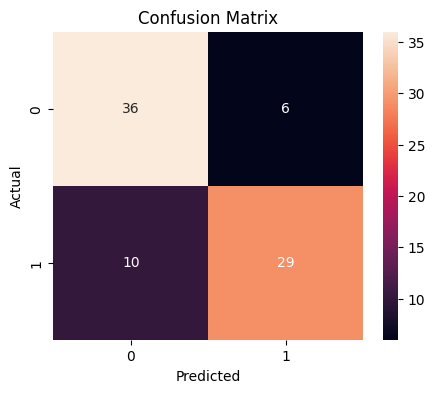

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Load data (replace with your actual file)
data = pd.read_csv("/content/HeartDisease1.csv")
X = data.iloc[:, 1:13].values  # Features from columns 1-12
y = data.iloc[:, 13].values    # Target in column 13

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train Random Forest
rfc = RandomForestClassifier(n_estimators=100, random_state=1)
rfc.fit(X_train, y_train)

# Predict and evaluate
y_pred = rfc.predict(X_test)
print("Classification Accuracy:", metrics.accuracy_score(y_test, y_pred) * 100)

# Confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Heatmap visualization
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#3 k_means clustering

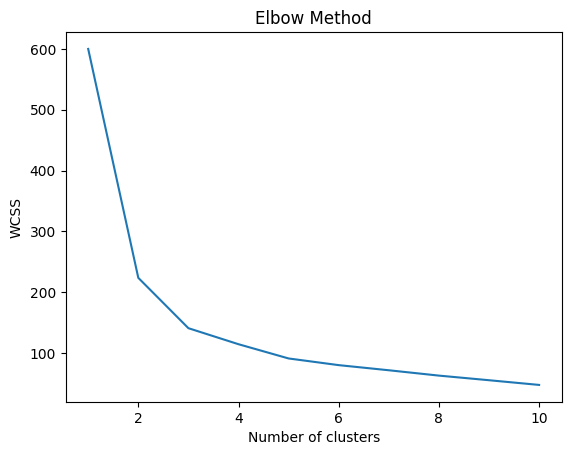

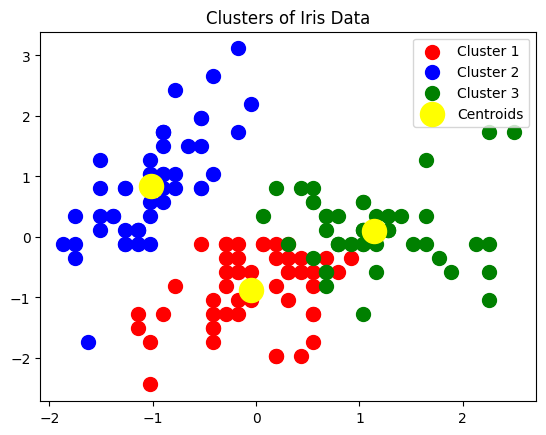

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data (replace with your actual file)
data = pd.read_csv("/content/Iris (1).csv")
X = data.iloc[:, [1, 2, 3, 4]].values  # Using all four features

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means with optimal clusters (3 for Iris dataset)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

# Visualize the clusters (using first two features)
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Iris Data')
plt.legend()
plt.show()

#4 Tokenization, Stemming, and Lemmatization using nltk

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

# Download required resources (only the first time)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Sample text
text = "The quick brown foxes are jumping over the lazy dogs. The dogs are not amused."

# Tokenization & Stopword Removal
tokens = [w for w in word_tokenize(text) if w.lower() not in stopwords.words('english') and w.isalpha()]

# Stemming and Lemmatization
stemmed = [PorterStemmer().stem(w) for w in tokens]
lemmatized = [WordNetLemmatizer().lemmatize(w) for w in tokens]

# Results
print("Original Text:", text)
print("Filtered Tokens:", tokens)
print("Stemmed:", stemmed)
print("Lemmatized:", lemmatized)


#5 Bag of Words Model in NLTK

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

nltk.download('punkt')
nltk.download('stopwords')

def create_bow_model(texts):
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for text in texts for word in word_tokenize(text)
             if word.isalpha() and word.lower() not in stop_words]
    return dict(FreqDist(words))

# Example texts
texts = [
    "The cat sat on the mat, and the mat was comfortable.",
    "She sang a sweet song, a song that touched everyone's heart.",
    "Coding coding can be challenging, but coding is also incredibly rewarding.",
]

# Build and print BoW model
bow = create_bow_model(texts)
print("Bag of Words Model:")
for word, freq in bow.items():
    print(f"{word}: {freq}")


# 6 To perform Modelling used for Identifying Patterns in Text Data

In [ ]:
import csv
import re

def count_pattern_in_column(file_path, column):
    pattern_counts = {}

    with open(file_path, 'r', newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            text = row[column]
            matches = re.findall(r'Female', text, flags=re.IGNORECASE)
            for match in matches:
                pattern_counts[match] = pattern_counts.get(match, 0) + 1

    return pattern_counts

# Usage
file_path = 'social.csv'  # Your CSV file path
column_name = 'Gender'    # The column to search in
result = count_pattern_in_column(file_path, column_name)

# Print results
for pattern, count in result.items():
    print(f"Pattern: {pattern}, Count: {count}")


# 7 To perform Analysing Sequential Data by HMM

In [ ]:
import numpy as np
from hmmlearn import hmm

# Define states and observations
states = ['Rainy', 'Sunny']
observations = ['Umbrella', 'Jacket', 'T-shirt']

# Model parameters
n_states = len(states)
trans_matrix = np.array([[0.7, 0.3], [0.4, 0.6]])
emission_matrix = np.array([[0.1, 0.4, 0.5],
                            [0.6, 0.3, 0.1]])
initial_probs = np.array([0.6, 0.4])

# Create and configure the HMM model
model = hmm.MultinomialHMM(n_components=n_states, n_iter=100)
model.startprob_ = initial_probs
model.transmat_ = trans_matrix
model.emissionprob_ = emission_matrix

# Training data (sequence of observations)
train_data = np.array([[0, 1, 2, 0, 1, 2, 0, 2, 1]]).T  # .T reshapes to column format
model.fit(train_data)

# New sequence to predict
test_data = np.array([[0, 2, 1]]).T
predicted = model.predict(test_data)

# Map numerical states to labels
predicted_labels = [states[i] for i in predicted]
print("Predicted Weather States:", predicted_labels)


#9 TIC-TAC-TOE

In [ ]:
def print_board(board):
    for row in board:
        print(" | ".join(row))
        print("-" * 10)


In [ ]:
def check_winner(board, player):
    for i in range(3):
        if all(board[i][j] == player for j in range(3)) or all(board[j][i] == player for j in range(3)):
            return True
    if all(board[i][i] == player for i in range(3)) or all(board[i][2 - i] == player for i in range(3)):
        return True
    return False


In [ ]:
def is_board_full(board):
    return all(board[i][j] != " " for i in range(3) for j in range(3))


In [ ]:
def tic_tac_toe():
    board = [[" " for _ in range(3)] for _ in range(3)]
    players = ["X", "O"]
    current_player = players[0]

    while True:
        print_board(board)

        # Get player move
        while True:
            row = int(input("Enter row (0, 1, or 2): "))
            col = int(input("Enter column (0, 1, or 2): "))
            if 0 <= row < 3 and 0 <= col < 3 and board[row][col] == " ":
                break
            else:
                print("Invalid move. Try again.")

        board[row][col] = current_player

        # Check for win
        if check_winner(board, current_player):
            print_board(board)
            print(f"Player {current_player} wins!")
            break

        # Check for tie
        if is_board_full(board):
            print_board(board)
            print("It's a tie!")
            break

        # Switch turns
        current_player = players[1] if current_player == players[0] else players[0]


In [ ]:
tic_tac_toe()

  |   |  
----------
  |   |  
----------
  |   |  
----------
Enter row (0, 1, or 2): 1
Enter column (0, 1, or 2): 1
  |   |  
----------
  | X |  
----------
  |   |  
----------
Enter row (0, 1, or 2): 0
Enter column (0, 1, or 2): 1
  | O |  
----------
  | X |  
----------
  |   |  
----------
Enter row (0, 1, or 2): 2
Enter column (0, 1, or 2): 0
  | O |  
----------
  | X |  
----------
X |   |  
----------
Enter row (0, 1, or 2): 0
Enter column (0, 1, or 2): 2
  | O | O
----------
  | X |  
----------
X |   |  
----------
Enter row (0, 1, or 2): 0
Enter column (0, 1, or 2): 0
X | O | O
----------
  | X |  
----------
X |   |  
----------
Enter row (0, 1, or 2): 2
Enter column (0, 1, or 2): 2
X | O | O
----------
  | X |  
----------
X |   | O
----------
Enter row (0, 1, or 2): 0
Enter column (0, 1, or 2): 1
Invalid move. Try again.
Enter row (0, 1, or 2): 1
Enter column (0, 1, or 2): 0
X | O | O
----------
X | X |  
----------
X |   | O
----------
Player X wins!


#10 Single layer perceptron and multilayer perceptron

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load and preprocess Iris dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to build, train, and evaluate a model
def train_and_evaluate(model_structure, name):
    model = tf.keras.Sequential(model_structure + [tf.keras.layers.Dense(3, activation='softmax')])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=15, verbose=0)
    preds = np.argmax(model.predict(X_test), axis=1)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.2f}")

# Single-layer NN
train_and_evaluate([tf.keras.layers.Dense(64, activation='relu', input_shape=(4,))], "Single-layer NN")

# Multi-layer NN
train_and_evaluate([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(32, activation='relu')
], "Multi-layer NN")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Single-layer NN Accuracy: 0.80


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Multi-layer NN Accuracy: 0.90


# 11 Linear Regressor using ANN

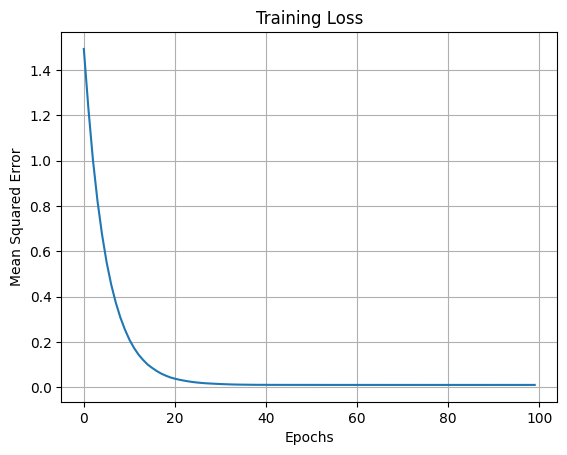

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Input: 0.2, Predicted Output: 1.4110031127929688
Input: 0.5, Predicted Output: 2.0139994621276855
Input: 0.8, Predicted Output: 2.6169958114624023


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Generate synthetic linear data
X_train = np.random.rand(100, 1)
y_train = 2 * X_train + 1 + 0.1 * np.random.randn(100, 1)

# Define a simple linear regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# Compile the model
model.compile(optimizer='sgd', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, verbose=0)

# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

# Predict on new inputs
X_test = np.array([[0.2], [0.5], [0.8]])
predictions = model.predict(X_test)

# Display predictions
for x, y in zip(X_test, predictions):
    print(f"Input: {x[0]}, Predicted Output: {y[0]}")


# 12 To perform Image Classifier: An Application of Deep Learning

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load and normalize the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize to [0,1]

# Reshape data to include channel dimension (grayscale: 1 channel)
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, validation_split=0.1)

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 61s 34ms/step - accuracy: 0.9015 - loss: 0.3243 - val_accuracy: 0.9817 - val_loss: 0.0589
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 74s 30ms/step - accuracy: 0.9839 - loss: 0.0514 - val_accuracy: 0.9867 - val_loss: 0.0407
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 78s 28ms/step - accuracy: 0.9901 - loss: 0.0306 - val_accuracy: 0.9878 - val_loss: 0.0418
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.9927 - loss: 0.0230 - val_accuracy: 0.9910 - val_loss: 0.0320
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9949 - loss: 0.0162 - val_accuracy: 0.9912 - val_loss: 0.0366
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9877 - loss: 0.0383

Test accuracy: 0.9906
